In [133]:
#Imports and function definitions


import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.metrics import silhouette_score, adjusted_rand_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.decomposition import PCA, KernelPCA

def stats(df,y):
    #Find stats for clusters
    tot = []
    gender = []
    married = []
    age = []
    grad = []
    prof = [] #profession mode
    profpct = [] #percent with profession mode
    score = [] #spending score mode
    work_exp = []
    var1 = []
    var1pct = []
    for i in (pd.unique(y)):
        clstr = pd.DataFrame(df[df.Cluster == i])
        total = len(clstr)
        
        
        if total>0:
            male = len(clstr[clstr.Gender == "Male"])
            profession = clstr["Profession"].mode()[0]
            scr = clstr["Spending_Score"].mode()[0]
            v1 = clstr["Var_1"].mode()[0]
            pct_male = (male/total)*100
            pct_married = (len(clstr[clstr.Ever_Married == "Yes"])/total)*100
            pct_graduated = (len(clstr[clstr.Graduated == "Yes"])/total)*100
            pct_prof = (len(clstr[clstr.Profession == profession])/total)*100
            pct_v1 = (len(clstr[clstr.Var_1 == v1])/total)*100
            gender.append(f"{pct_male:.2f}%")
            married.append(f"{pct_married:.2f}%")
            grad.append(f"{pct_graduated:.2f}%")
            profpct.append(f"{pct_prof:.2f}%")
            
        else:
            continue

        
        
        work_exp.append(clstr["Work_Experience"].median())
        
        var1.append(v1)
        var1pct.append(pct_v1)
        score.append(scr)
        
        prof.append(profession)
        age.append(f"{clstr["Age"].median():.1f}")
        
        tot.append(total)

    table = pd.DataFrame()
    table["Number"]=tot
    table["Percent_Male"]=gender
    table["Percent_Married"]=married
    table["Median_Age"] = age
    table["Percent_Graduated"]=grad
    table["Profession_Mode"] = prof
    table["Percent_Profession_Mode"] = profpct
    table["Spending_Score_Mode"] = score
    table["Work_Experience_Median"] = work_exp
    table["Var_1_Mode"]= var1
    table["Percent_Var_1_Mode"] = var1pct

    return table


In [135]:

df = pd.read_csv('./archive/Train.csv')

#Drop ID column and rows with missing data
df = df.drop('ID', axis=1)
print("Original data entries are", len(df))
df = df.dropna(axis=0)
df_og = df
df = df.drop('Segmentation', axis=1)
print("Our data now contains",len(df),"entries.")
print(df.value_counts(subset="Profession"))


#fill in missing data using mode for categorical columns
categorical_columns = ['Ever_Married', 'Graduated','Profession']

for column in categorical_columns:
    if df[column].isnull().sum() > 0: # Check if the column has missing values
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)

#fill in  missing data using median for numerical columns
numerical_columns = ['Age', 'Family_Size', 'Work_Experience']

for column in numerical_columns:
    if df[column].isnull().sum() > 0:
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)

#numericize data
df=pd.get_dummies(df, columns = ['Profession','Var_1'])
df=df.replace(['Yes',True,'Female','Average'], 1)
df=df.replace(['No',False,'Male','Low'], 0)
df=df.replace('High',2)
df = df.drop('Profession_Artist', axis=1)
df = df.drop('Var_1_Cat_7', axis=1)

#Apply Standar Scalar
X = df.iloc[:].values
X_std = StandardScaler().fit_transform(X)

#apply PCA
pca = PCA(n_components='mle')
X_pca = pca.fit_transform(X_std)

df.head(15)


Original data entries are 8068
Our data now contains 6665 entries.
Profession
Artist           2192
Healthcare       1077
Entertainment     809
Doctor            592
Engineer          582
Executive         505
Lawyer            500
Marketing         233
Homemaker         175
Name: count, dtype: int64


C:\Users\Ligia\AppData\Local\Temp\ipykernel_18760\1200792838.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace(['No',False,'Male','Low'], 0)
C:\Users\Ligia\AppData\Local\Temp\ipykernel_18760\1200792838.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace('High',2)


,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6
0,0,0,22,0,1.0,0,4.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,1,67,1,1.0,0,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,67,1,0.0,2,2.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,0,1,56,0,0.0,1,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,32,1,1.0,0,3.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7,1,0,33,1,1.0,0,3.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8,1,1,61,1,0.0,0,3.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,55,1,1.0,1,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,1,0,26,1,1.0,0,3.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
11,0,0,19,0,4.0,0,4.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [47]:


#Apply clustering algorithms for number of clusters from 2 to 30
km_silhouette_scores = []
hc_complete_silhouette_scores = []
hc_average_silhouette_scores = []
hc_ward_silhouette_scores = []
hc_single_silhouette_scores = []
inertia = []
for i in range(2, 30):
    #apply Kmeans clustering
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    y_km = km.fit_predict(X_pca)
    #find silhouette score and inertia
    inertia.append(km.inertia_)
    km_score = silhouette_score(X_pca, y_km)
    km_silhouette_scores.append(km_score)

    
    
    #apply hierarchical clustering with complete linkage
    hc_complete = cluster.AgglomerativeClustering(n_clusters=i, linkage='complete')
    y_hc_complete = hc_complete.fit_predict(X_pca)
    #find silhouette score if more than one cluster
    hc_complete_score = silhouette_score(X_pca, y_hc_complete)
    hc_complete_silhouette_scores.append(hc_complete_score)


    #apply hierarchical clustering with average linkage
    hc_average = cluster.AgglomerativeClustering(n_clusters=i, linkage='average')
    y_hc_average = hc_average.fit_predict(X_pca)
    #find silhouette score 
    hc_average_score = silhouette_score(X_pca, y_hc_average)
    hc_average_silhouette_scores.append(hc_average_score)
    

    #apply hierarchical clustering with ward linkage
    hc_ward = cluster.AgglomerativeClustering(n_clusters=i, linkage='ward')
    y_hc_ward = hc_ward.fit_predict(X_pca)
    #find silhouette score 
    hc_ward_score = silhouette_score(X_pca, y_hc_ward)
    hc_ward_silhouette_scores.append(hc_ward_score)

    
    hc_single = cluster.AgglomerativeClustering(n_clusters=i, linkage='single')
    y_hc_single = hc_single.fit_predict(X_pca)
    #find silhouette score 
    hc_single_score = silhouette_score(X_pca, y_hc_single)
    hc_single_silhouette_scores.append(hc_single_score)
    












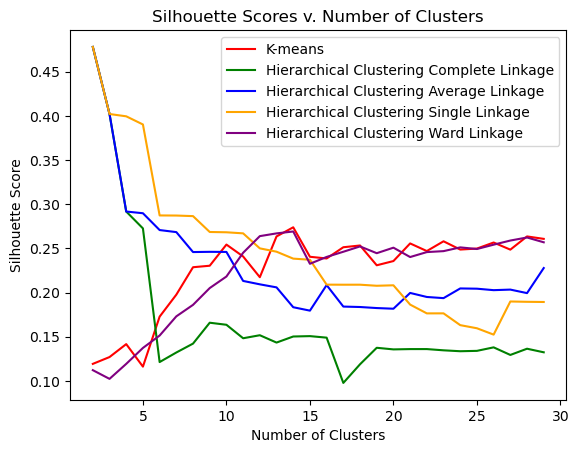

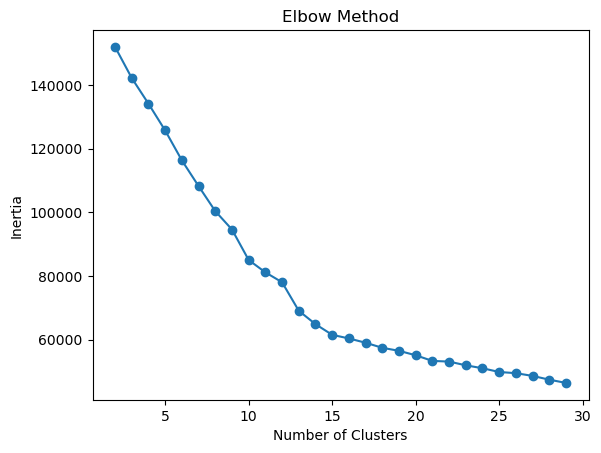

In [49]:
#plot silhouette scores vs. number of clusters
num_clusters_sil = np.arange(2,30)
plt.plot(num_clusters_sil, km_silhouette_scores, color = 'red', label='K-means')
plt.plot(num_clusters_sil, hc_complete_silhouette_scores, color = 'green', label='Hierarchical Clustering Complete Linkage')
plt.plot(num_clusters_sil, hc_average_silhouette_scores, color = 'blue', label='Hierarchical Clustering Average Linkage')
plt.plot(num_clusters_sil, hc_single_silhouette_scores, color = 'orange', label='Hierarchical Clustering Single Linkage')
plt.plot(num_clusters_sil, hc_ward_silhouette_scores, color = 'purple', label='Hierarchical Clustering Ward Linkage')
plt.title("Silhouette Scores v. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

#Plot intertia of kmeans for elbow method plot
plt.plot(range(2, 30), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The silhouette score for min_samples = 8 and eps = 3.300000 is 0.224021
The silhouette score for min_samples = 8 and eps = 3.350000 is 0.227939
The silhouette score for min_samples = 8 and eps = 3.400000 is 0.230129
The silhouette score for min_samples = 8 and eps = 3.450000 is 0.221627
The silhouette score for min_samples = 8 and eps = 3.500000 is 0.221499
The silhouette score for min_samples = 8 and eps = 3.550000 is 0.184077
The silhouette score for min_samples = 8 and eps = 3.600000 is 0.184451
The silhouette score for min_samples = 8 and eps = 3.650000 is 0.183394
The silhouette score for min_samples = 8 and eps = 3.700000 is 0.194941
Best silhouette_score: 0.2301287079888828
min_samples: 8
eps: 3.3999999999999995


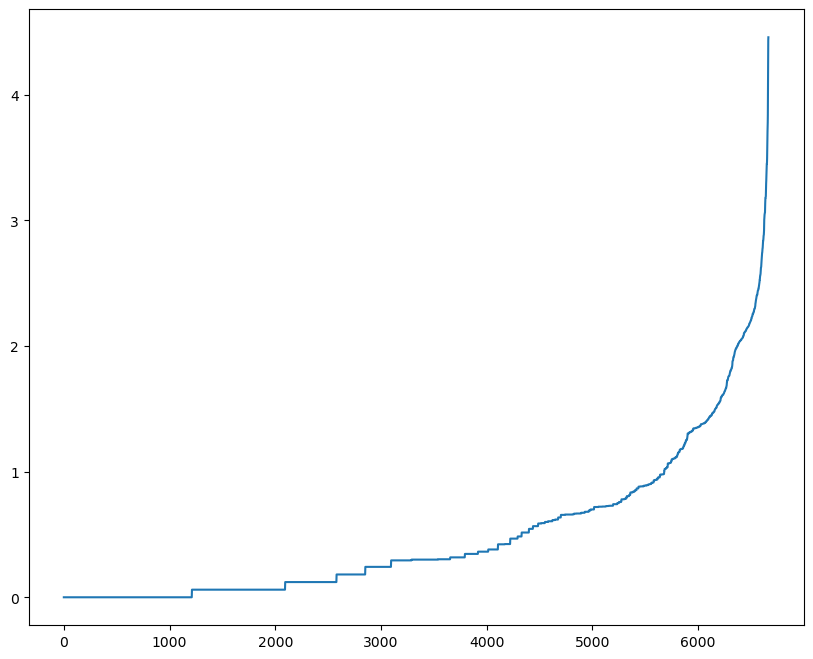

In [137]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


#find best epsilon
nn = NearestNeighbors(n_neighbors=20).fit(X_std)
distances, indices = nn.kneighbors(X_std)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

min_samples = range(4,7)
eps = np.arange(3.3,3.7, 0.05)



#caluculate the best epsilon and min_samples values to use with DBSCAN
output = []


for ep in eps:
    y_db = DBSCAN(min_samples=8, eps = ep).fit_predict(X_std)
    score = silhouette_score(X_std, y_db)
    output.append((ep, score))
    print("The silhouette score for min_samples = 8 and eps = %f is %f"%(ep,score))

eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print("min_samples: 8")
print(f"eps: {eps}")


In [129]:
#Apply KMeans with 15 clusters
km = KMeans(n_clusters=15, 
            init='k-means++', 
            n_init=10, 
            max_iter=300, 
            random_state=0)
y_km = km.fit_predict(X_pca)
km_score = silhouette_score(X_pca, y_km)
print("The silhouette score using KMeans is", km_score, "with 15 clusters.")
df_km = df_og
df_km["Cluster"] = y_km
gender = []
married = []
age = []
print(df_km.value_counts(subset=["Cluster","Var_1"]))


stats(df_km,y_km).head(15)
    


The silhouette score using KMeans is 0.24376990040202956 with 15 clusters.
Cluster  Var_1
0        Cat_6    1114
9        Cat_6     592
3        Cat_6     547
1        Cat_3     532
8        Cat_6     507
6        Cat_4     454
5        Cat_6     439
2        Cat_6     380
11       Cat_6     366
12       Cat_2     337
4        Cat_6     296
         Cat_4     167
10       Cat_6     127
14       Cat_6     108
13       Cat_1     104
11       Cat_4      86
7        Cat_5      74
2        Cat_4      64
0        Cat_7      41
10       Cat_3      39
         Cat_4      37
14       Cat_3      33
9        Cat_7      32
5        Cat_4      26
11       Cat_7      24
8        Cat_7      22
5        Cat_3      16
14       Cat_4      15
3        Cat_7      15
2        Cat_3      14
4        Cat_7      13
14       Cat_2      11
10       Cat_7      10
         Cat_2       8
2        Cat_7       7
5        Cat_2       5
2        Cat_2       1
5        Cat_7       1
14       Cat_7       1
Name: count, 

,Number,Percent_Male,Percent_Married,Median_Age,Percent_Graduated,Profession_Mode,Percent_Profession_Mode,Spending_Score_Mode,Work_Experience_Median,Var_1_Mode,Percent_Var_1_Mode
0,454,61.45%,44.27%,33.0,45.81%,Healthcare,38.33%,Low,1.0,Cat_4,100.000000
1,476,19.75%,61.34%,40.0,45.38%,Engineer,100.00%,Low,1.0,Cat_6,62.184874
2,487,48.87%,94.25%,77.0,65.09%,Lawyer,100.00%,High,1.0,Cat_6,90.143737
3,1155,57.32%,100.00%,49.0,90.13%,Artist,97.66%,Average,1.0,Cat_6,96.450216
4,624,58.81%,9.62%,27.0,39.90%,Healthcare,99.20%,Low,1.0,Cat_6,94.871795
5,532,56.58%,53.57%,38.0,59.21%,Artist,33.46%,Low,1.0,Cat_3,100.000000
6,104,49.04%,59.62%,38.5,58.65%,Artist,30.77%,Low,1.0,Cat_1,100.000000
7,168,17.26%,54.76%,35.5,55.95%,Homemaker,100.00%,Low,8.0,Cat_6,64.285714
8,529,74.10%,61.44%,42.0,67.86%,Entertainment,100.00%,Low,1.0,Cat_6,95.841210
9,562,42.17%,16.37%,39.0,91.64%,Artist,99.64%,Low,4.0,Cat_6,97.330961


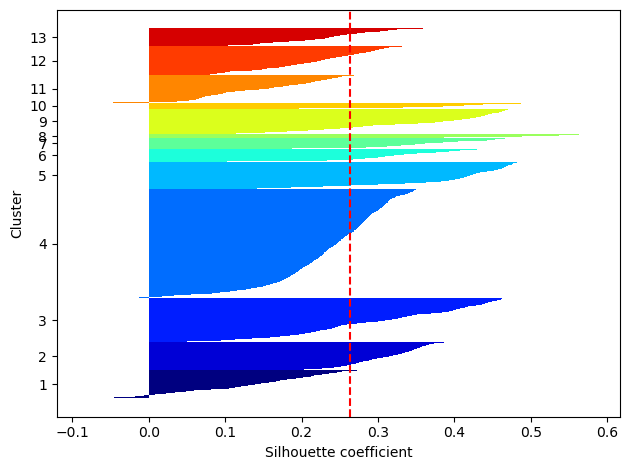

In [53]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_pca, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",
            linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
>>> plt.show()

In [67]:
#apply hierarchical clustering with single linkage and 2 clusters
hc_single = cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
y_hc_single = hc_single.fit_predict(X_pca)
#find silhouette score 
hc_single_score = silhouette_score(X_pca, y_hc_single)
print("The silhouette score using average linkage hierarchical clustering is", hc_single_score, "with 2 clusters.")
df_single = df_og
df_single["Cluster"] = y_hc_single
print(df_single.value_counts(subset="Var_1"))
stats(df_single,y_hc_single).head(2)

The silhouette score using average linkage hierarchical clustering is 0.4707088373421069 with 2 clusters.
Var_1
Cat_6    4476
Cat_4     849
Cat_3     634
Cat_2     362
Cat_7     166
Cat_1     104
Cat_5      74
Name: count, dtype: int64


,Number,Percent_Male,Percent_Married,Median_Age,Percent_Graduated,Profession_Mode,Percent_Profession_Mode,Spending_Score_Mode,Work_Experience_Median,Var_1_Mode,Percent_Var_1_Mode
0,6591,55.38%,59.25%,41.0,63.89%,Artist,32.92%,Low,1.0,Cat_6,67.910787
1,74,36.49%,52.70%,33.0,51.35%,Artist,29.73%,Low,1.0,Cat_5,100.000000


In [131]:
#apply DBSCAN, we found the best values to use were eps=3.4, min_samples=8
db = DBSCAN(eps=3.4, min_samples=8, metric='euclidean')
y_db = db.fit_predict(X_pca)
db_silhouette = silhouette_score(X_pca, y_db)
print("The silhouette score using DBSCAN is", db_silhouette, "with", len(np.unique(y_db)-1), "clusters.")
df_db = df_og
df_db["Cluster"] = y_db
print(df_db.value_counts(subset="Cluster"))
stats(df_db,y_db).head(20)


The silhouette score using DBSCAN is 0.2209536762964496 with 19 clusters.
Cluster
 0     3704
 1      548
 3      542
 9      472
 2      439
 6      263
 7      211
 5      155
-1       83
 4       63
 8       47
 14      37
 13      26
 11      18
 12      18
 17      15
 10       8
 15       8
 16       8
Name: count, dtype: int64


,Number,Percent_Male,Percent_Married,Median_Age,Percent_Graduated,Profession_Mode,Percent_Profession_Mode,Spending_Score_Mode,Work_Experience_Median,Var_1_Mode,Percent_Var_1_Mode
0,3704,58.67%,55.05%,40.0,70.55%,Artist,54.91%,Low,1.0,Cat_6,74.487041
1,548,20.26%,62.04%,40.0,46.35%,Engineer,100.00%,Low,1.0,Cat_6,54.014599
2,439,48.29%,94.08%,77.0,66.29%,Lawyer,100.00%,High,1.0,Cat_6,100.000000
3,542,56.09%,46.49%,35.0,58.12%,Doctor,100.00%,Low,1.0,Cat_6,67.527675
4,63,42.86%,55.56%,39.0,73.02%,Artist,50.79%,Low,1.0,Cat_1,100.000000
5,155,18.06%,56.77%,36.0,56.13%,Homemaker,100.00%,Low,8.0,Cat_6,69.677419
6,263,54.75%,36.88%,35.0,64.26%,Healthcare,40.68%,Low,1.0,Cat_2,100.000000
7,211,46.45%,34.12%,33.0,39.81%,Marketing,100.00%,Low,1.0,Cat_6,60.189573
8,47,38.30%,48.94%,33.0,55.32%,Artist,46.81%,Low,1.0,Cat_5,100.000000
9,472,96.19%,94.49%,50.0,53.18%,Executive,100.00%,High,1.0,Cat_6,80.508475
